In [3]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #generating graphs

In [4]:
#Importing DataSet 
dataset = pd.read_csv("weather.csv")
temp=dataset['temperaturemin']
precipitation=dataset['precipitation']

In [6]:
dataset.head(5)

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [13]:
dataset.info

<bound method DataFrame.info of             date  temperaturemin  temperaturemax  precipitation  snowfall  \
0     2011-02-13            25.0            61.0           0.00       0.0   
1     2011-02-16            34.0            63.0           0.00       0.0   
2     2011-02-18            52.0            78.1           0.00       0.0   
3     2011-03-03            35.1            53.1           0.00       0.0   
4     2011-03-16            46.9            64.0           0.05       0.0   
...          ...             ...             ...            ...       ...   
4492  2019-03-15            57.9            73.9           0.31       0.0   
4493  2019-03-17            35.1            57.0           0.00       0.0   
4494  2019-03-26            39.0            55.9           0.06       0.0   
4495  2019-04-09            61.0            73.9           0.04       0.0   
4496  2019-04-23            46.0            81.0           0.00       0.0   

      snowdepth  avgwindspeed  fastest2minw

In [14]:
# Command to find if there is any missing data
missing = temp.isnull().sum() 
percentage = temp.isnull().mean() * 100

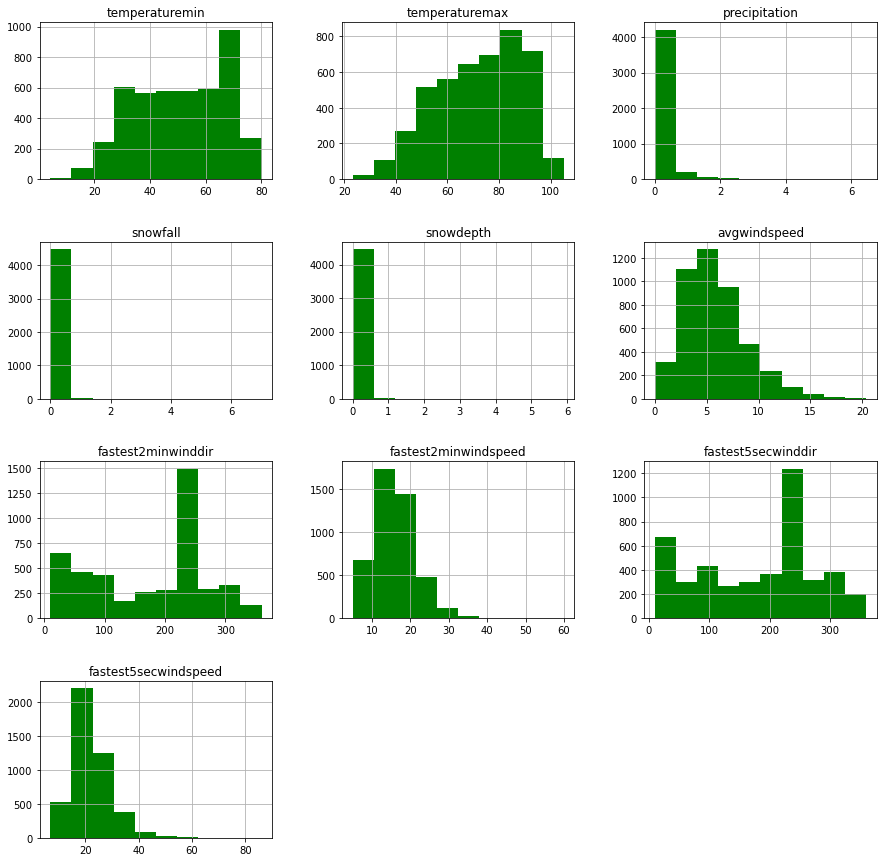

In [21]:
dataset.hist(figsize=(15,15), color = 'green')
plt.subplots_adjust(hspace=0.4);

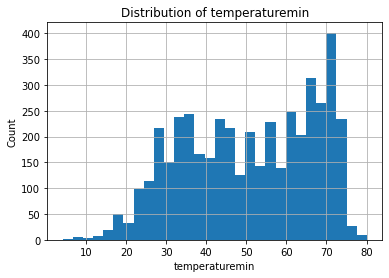

In [23]:
dataset.temperaturemin.hist(bins=30)
plt.xlabel('temperaturemin')
plt.ylabel('Count')
plt.title('Distribution of temperaturemin');

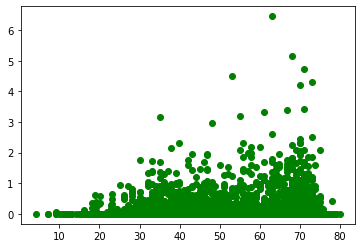

In [12]:
plt.scatter(temp, precipitation, color= 'green')

In [34]:
import plotly.graph_objects as go

import pandas as pd
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure([go.Scatter(x=dataset['date'], y=dataset['precipitation'])])
fig.show()

In [8]:
x = np.array(temp).reshape(-1, 1) # function name says it : reshape the array
y = np.array(precipitation)

In [11]:
x

array([[25.],
       [34.],
       [52.],
       ...,
       [39.],
       [61.],
       [46.]])

In [35]:
#Splitting the data into Train and Test
#from sklearn.cross_validation import train_test_split in earlier version
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=1/3, random_state=0 )

In [36]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit( xtrain, ytrain )

LinearRegression()

In [37]:
regressor.coef_ , regressor.intercept_# y = mx + c , m is coef , c is intercept

(array([0.00272922]), -0.009796835685637661)

In [38]:
actualValue = ytrain
predictedValue = regressor.predict(xtrain) 
xtrain[0], actualValue[0] , predictedValue[0]

(array([35.1]), 0.0, 0.0859988217604445)

In [39]:
regressor.coef_ * xtrain[0] + regressor.intercept_ # y = mx + c

array([0.08599882])

In [40]:
np.sqrt ( sum( abs( actualValue**2 - predictedValue**2 ) ) ) / len( xtrain ) # RMSE
# Root Mean Square Error

0.00720424776737392

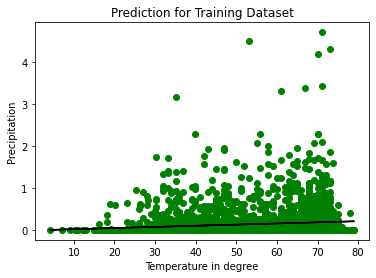

In [41]:
#Visualizing the training Test Results 
# Actual values
plt.scatter(xtrain, ytrain, color='green') # x = xtrain , y = ytrain

#Predicted values
prediction = regressor.predict(xtrain)
plt.plot(xtrain, prediction , color = 'black') # y = prediction

plt.title ("Prediction for Training Dataset")
plt.xlabel("Temperature in degree"), plt.ylabel("Precipitation")
plt.show()

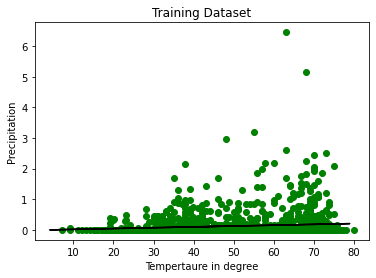

In [42]:
#Visualizing the Test Results 

plt.scatter(xtest, ytest, color= 'green')

plt.plot(xtrain, regressor.predict(xtrain), color = 'black')

plt.title ("Training Dataset")
plt.xlabel("Tempertaure in degree"), plt.ylabel("Precipitation")
plt.show()

In [43]:
d=dataset['avgwindspeed'].value_counts()

<AxesSubplot:>

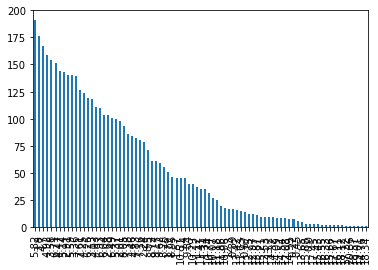

In [44]:
d.plot(kind='bar')